# <center>  Anti-rosalind Rosalind club

## Seminars, 25.11.2022, 2.12.2022 and 9.12.2022

This is the seminar on solving bioinformatics problems from [Rosalind](https://rosalind.info/problems/locations/) platform.

Teching assistants:

- Nikita Vaulin, Nikita.Vaulin@skoltech.ru, tg: @nvaulin
    
- Oksana Kotovskaya, Oksana.Kotovskaya@skoltech.ru

In [2]:
import os.path
import pyperclip


filename = os.path.join('input', 'file.txt')
print(filename)

input/file.txt


### #2. Bioinformatics Stronghold

### HAMM: Counting Point Mutations

In [3]:
filename = os.path.join('input', 'rosalind_hamm.txt')

In [4]:
def calculate_hamming_distance(seq_a, seq_b):
    d_h = 0
    n = len(seq_a)
    for i in range(n):
        if seq_a[i] != seq_b[i]:
            d_h += 1
    return d_h


assert calculate_hamming_distance('GAGCCTACTAACGGGAT', 'CATCGTAATGACGGCCT') == 7

seqs = [None, None]
with open(filename, 'r') as in_f:
    for i, line in enumerate(in_f):
         seqs[i] = line.strip()

distance = calculate_hamming_distance(seqs[0], seqs[1])
pyperclip.copy(distance)


In [5]:
distance

461

### FIBD: Mortal Fibonacci Rabbits

In [6]:
filename = os.path.join('input', 'rosalind_fibd.txt')

In [7]:
def mortal_fibbo_rabbits_count(n: int, m: int) -> int:
    population = [[0] * m for _ in range(n + 1)]

    population[0][0] = 0
    population[1][0] = 1

    for month in range(2, n + 1):
        for age in range(0, m):
            if age == 0:
                population[month][age] = sum(population[month - 1][1:])
            else:
                population[month][age] = population[month - 1][age - 1]

    return sum(population[-1])


assert mortal_fibbo_rabbits_count(6, 3) == 4

with open(filename, 'r') as in_f:
    line = in_f.readline()
    n, m = [int(i) for i in line.strip().split()]

rabbits = mortal_fibbo_rabbits_count(n, m)
pyperclip.copy(rabbits)

In [8]:
rabbits

259182962981517626

### PRTM: Calculating Protein Mass

In [9]:
filename = os.path.join('input', 'rosalind_prtm.txt')

In [10]:
import os
import csv


def get_mass(seq: str) -> float:
    table = {}
    with open(os.path.join('input', 'monoisotropic_mass.tsv'), 'r') as tab:
        csv_f = csv.reader(tab, delimiter='\t')
        for row in csv_f:
            table[row[0]] = float(row[1])
    mass = 0
    for aa in seq:
        mass += table[aa]
    return round(mass, 3)


def get_seq(file: str) -> str:
    seq = ''
    with open(file, 'r') as in_f:
        for line in in_f:
            seq += line.strip()
            
    return seq


sequence = get_seq(filename)
mass = get_mass(sequence)
pyperclip.copy(mass)

In [11]:
mass

106026.653

### PERM: Enumerating Gene Orders

#### Lexicographic order.

Imagine, you have 2 words:

    BANTIK
    BANANA 
    
    
    
Which will be larger with respect to lexicographical order?

    BANANA
    |||^
    BANTIK 
    
    
We can sort them in this way:
    
    BANANA
    BANTIK
    1
    11
    123
    134
    2

#### Simplifying the problem: generation of binary sequence.

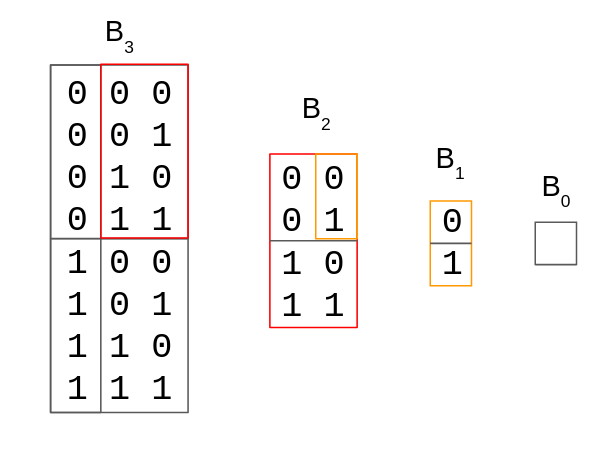

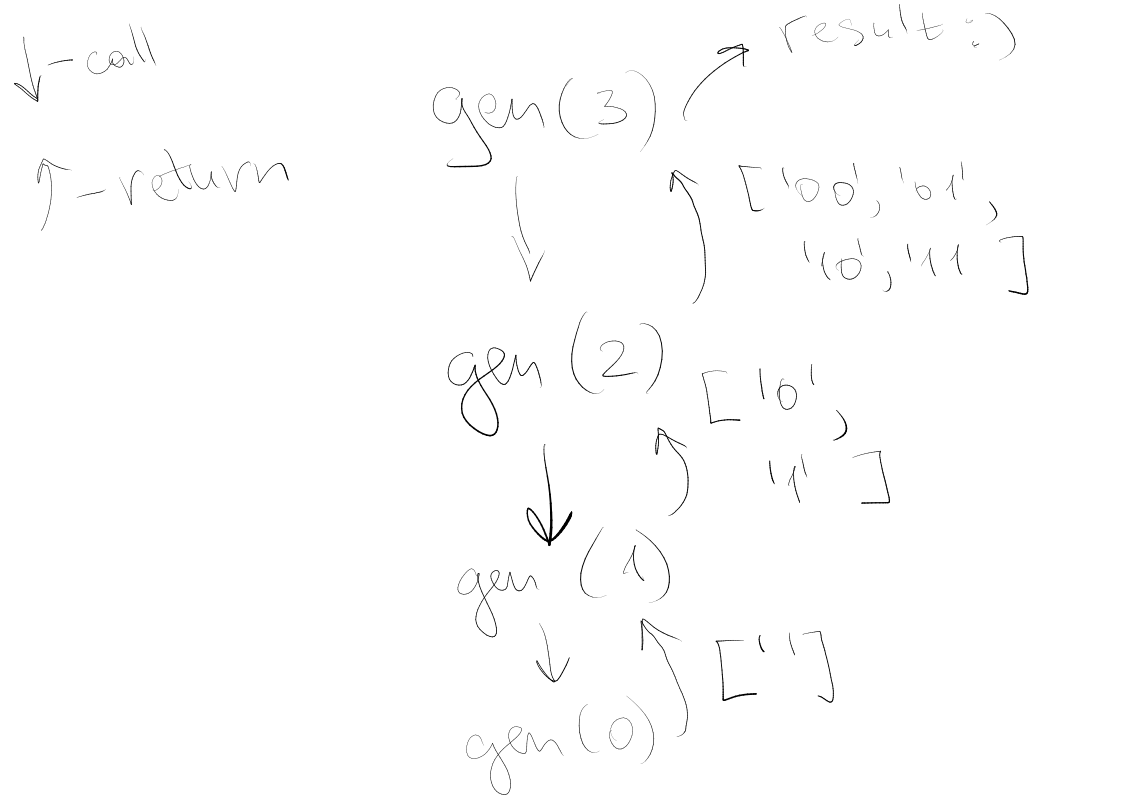

In [12]:
def generate_binary(n: int) -> str:
    """
    return all binary sequences with length n
    """
    # boundary conditions
    if n == 0:
        sequences = ['']
        return sequences
    # recurrent formula
    sequences = generate_binary(n - 1)
    sequences_0 = ['0' + s for s in sequences]
    sequences_1 = ['1' + s for s in sequences]
    return sequences_0 + sequences_1

In [13]:
generate_binary(3)

['000', '001', '010', '011', '100', '101', '110', '111']

Another approach: generation with prefix.

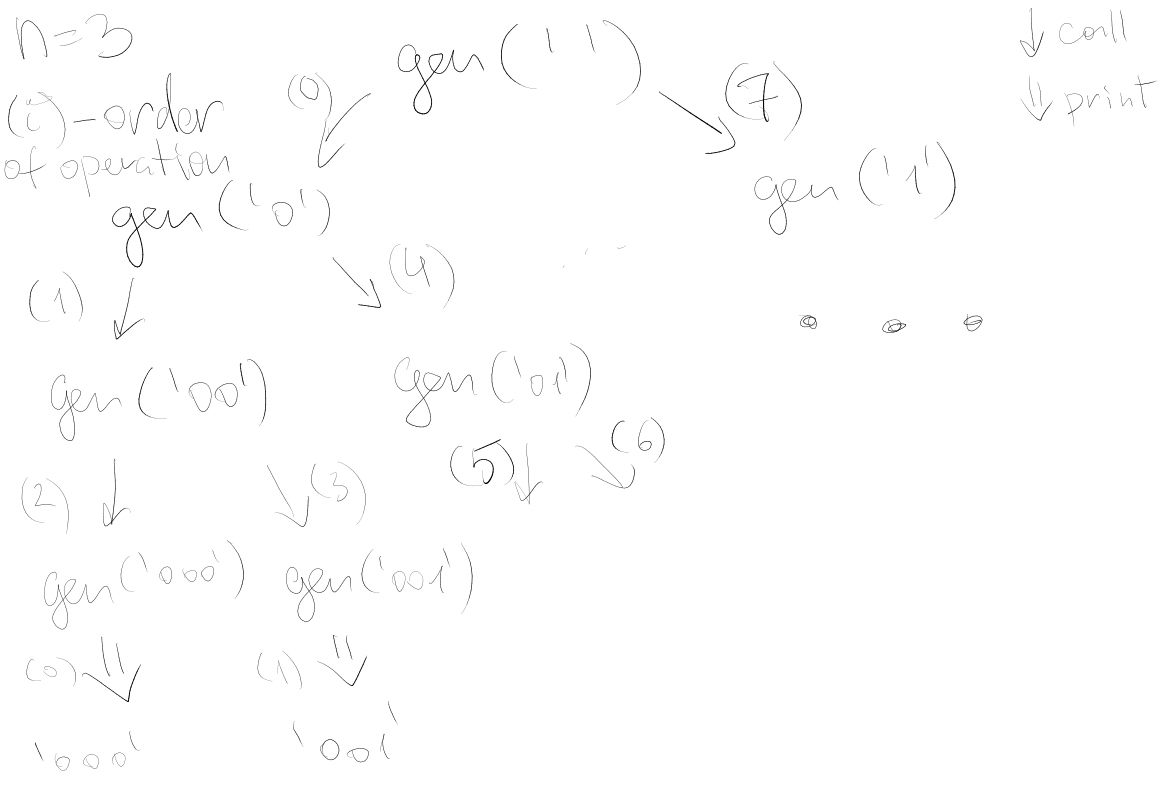

In [14]:
def generate_binary_prefix(n: int, pref: str) -> str:
    """
    return all binary sequences with length n,
    starting with prefix pref 
    """
    # if we need to return comb. object, we print it
    if len(pref) == n:
        print(pref)
        return
    # try to add 1 symbol to current prefix, 
    # adding symbols in lexicographic order!
    generate_binary_prefix(n, pref + '0')
    generate_binary_prefix(n, pref + '1')

In [15]:
generate_binary_prefix(3, '')

000
001
010
011
100
101
110
111


All ternary sequences?

In [16]:
def generate_ternary_prefix(n: int, pref: str) -> str:
    """
    return all binary sequences with length n,
    starting with prefix pref 
    """
    # if we need to return comb. object, we print it
    if len(pref) == n:
        print(pref)
        return
    # try to add 1 symbol to current prefix, 
    # adding symbols in lexicographic order!
    generate_ternary_prefix(n, pref + '0')
    generate_ternary_prefix(n, pref + '1')
    generate_ternary_prefix(n, pref + '2')

In [17]:
generate_ternary_prefix(3, '')

000
001
002
010
011
012
020
021
022
100
101
102
110
111
112
120
121
122
200
201
202
210
211
212
220
221
222


What about permutation?

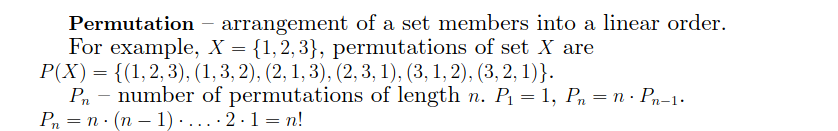

Let's write all permutations of $n=3$ in lexicographic order.


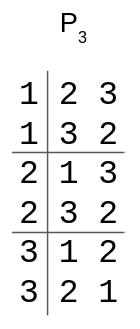

In [18]:
def generate_permutation_prefix(n: int, pref: list) -> str:
    """
    return all binary sequences with length n,
    starting with prefix pref 
    """
    # if we need to return comb. object, we print it
    if len(pref) == n:
        print(*pref)
        return
    
    # try to add 1 symbol to current prefix, 
    # adding symbols in lexicographic order!
    # (!) check of if prefix is correct 
    for i in range(1, n + 1):
        # in which case we can append i to prefix
        # with respect to definition of permutation
        if i not in pref:
            generate_permutation_prefix(n, pref + [i])

In [19]:
generate_permutation_prefix(3, [])

1 2 3
1 3 2
2 1 3
2 3 1
3 1 2
3 2 1


In [20]:
print(*[1, 2, 3])

1 2 3


Another realization:

In [21]:
filename = os.path.join('input', 'rosalind_perm.txt')

In [22]:
def permutations(n, pref, answer):
    if len(pref) == n:
        answer.append(pref)
    else:
        for i in range(1, n+1):
            if i not in pref:
                permutations(n, pref+[i], answer)
    pass

with open(filename, 'r') as in_f:
    n = int(in_f.readline())

answer = []

permutations(n, [], answer)

print(len(answer))
for perm in answer:
    print(' '.join(str(p) for p in perm))


120
1 2 3 4 5
1 2 3 5 4
1 2 4 3 5
1 2 4 5 3
1 2 5 3 4
1 2 5 4 3
1 3 2 4 5
1 3 2 5 4
1 3 4 2 5
1 3 4 5 2
1 3 5 2 4
1 3 5 4 2
1 4 2 3 5
1 4 2 5 3
1 4 3 2 5
1 4 3 5 2
1 4 5 2 3
1 4 5 3 2
1 5 2 3 4
1 5 2 4 3
1 5 3 2 4
1 5 3 4 2
1 5 4 2 3
1 5 4 3 2
2 1 3 4 5
2 1 3 5 4
2 1 4 3 5
2 1 4 5 3
2 1 5 3 4
2 1 5 4 3
2 3 1 4 5
2 3 1 5 4
2 3 4 1 5
2 3 4 5 1
2 3 5 1 4
2 3 5 4 1
2 4 1 3 5
2 4 1 5 3
2 4 3 1 5
2 4 3 5 1
2 4 5 1 3
2 4 5 3 1
2 5 1 3 4
2 5 1 4 3
2 5 3 1 4
2 5 3 4 1
2 5 4 1 3
2 5 4 3 1
3 1 2 4 5
3 1 2 5 4
3 1 4 2 5
3 1 4 5 2
3 1 5 2 4
3 1 5 4 2
3 2 1 4 5
3 2 1 5 4
3 2 4 1 5
3 2 4 5 1
3 2 5 1 4
3 2 5 4 1
3 4 1 2 5
3 4 1 5 2
3 4 2 1 5
3 4 2 5 1
3 4 5 1 2
3 4 5 2 1
3 5 1 2 4
3 5 1 4 2
3 5 2 1 4
3 5 2 4 1
3 5 4 1 2
3 5 4 2 1
4 1 2 3 5
4 1 2 5 3
4 1 3 2 5
4 1 3 5 2
4 1 5 2 3
4 1 5 3 2
4 2 1 3 5
4 2 1 5 3
4 2 3 1 5
4 2 3 5 1
4 2 5 1 3
4 2 5 3 1
4 3 1 2 5
4 3 1 5 2
4 3 2 1 5
4 3 2 5 1
4 3 5 1 2
4 3 5 2 1
4 5 1 2 3
4 5 1 3 2
4 5 2 1 3
4 5 2 3 1
4 5 3 1 2
4 5 3 2 1
5 1 2 3 4
5 1 2 4 3
5 1 3 2 4
5 1 3 

### SUBS: Finding a Motif in DNA

In [23]:
filename = os.path.join('input', 'rosalind_subs.txt')

In [24]:
def find_all_locations(s: str, t: str) -> list:
    n = len(s)
    m = len(t)
    search = []
    index_sub = 0
    for index in range(n - m):
        subsequence = s[index: index + m]
        if subsequence == t:
            search.append(index + 1)
    return search


s = 'GATATATGCATATACTT'
t = 'ATAT'
assert find_all_locations(s, t) == [2, 4, 10]

with open(filename, 'r') as in_f:
    s = in_f.readline().strip()
    t = in_f.readline().strip()

    
locations = find_all_locations(s, t)

In [25]:
%%time
print(*find_all_locations(s, t))

21 46 53 60 67 135 142 204 268 280 317 373 393 424 459 478 485 492 508 543 550 557 565 598 633 641 706 713 732 800 812 834
CPU times: user 999 µs, sys: 136 µs, total: 1.14 ms
Wall time: 1.14 ms


This algorithm: 
(same)

In [26]:
def rabin_karp_algo(s: str, t: str):
    n = len(s)
    m = len(t)
    ht = hash(t)
    a = []
    for i in range(n - m):
        hs = hash(s[i: i + m])
        if hs == ht:
            if s[i: i + m] == t:
                a.append(i + 1)
    return a


s = 'GATATATGCATATACTT'
t = 'ATAT'

assert rabin_karp_algo(s, t) == [2, 4, 10]

with open('data/rosalind_subs.txt', 'r') as in_f:
    s = in_f.readline().strip()
    t = in_f.readline().strip()


In [27]:
%%time
print(*rabin_karp_algo(s, t))

21 46 53 60 67 135 142 204 268 280 317 373 393 424 459 478 485 492 508 543 550 557 565 598 633 641 706 713 732 800 812 834
CPU times: user 529 µs, sys: 70 µs, total: 599 µs
Wall time: 473 µs


### MRNA: Inferring mRNA from Protein

In [28]:
filename = os.path.join('input', 'rosalind_mrna.txt')

In [29]:
def find_modulo_rna_num(sequence: str) -> int:
    codons_num=  {'I': 3, 'L': 6, 'V': 4, 'F': 2,
                  'M': 1, 'C': 2, 'A': 4, 'G': 4,
                  'P': 4, 'T': 4, 'S': 6, 'Y': 2,
                  'W': 1, 'Q': 2, 'N': 2, 'H': 2,
                  'E': 2, 'D': 2, 'K': 2, 'R': 6}
    rna_num = 3
    for nucleotide in sequence:
        rna_num *= codons_num[nucleotide]

    return rna_num % 1000000


assert find_modulo_rna_num('MA') == 12

with open(filename, 'r') as in_f:
    s = in_f.readline().strip()

print(find_modulo_rna_num(s))

219648


### IPRB: Mendel's First Law

In [30]:
filename = os.path.join('input', 'rosalind_iprb.txt')

In [31]:
def count_prob_dominant(k, m, n):
    sum_ = k + n + m

    res = 1 - ( n * (n - 1) + m * (m - 1) / 4 + m * n) / (sum_ * (sum_ - 1))
    return res


k = 2
m = 2
n = 2

assert round(count_prob_dominant(k, n, n), 5) == 0.78333

with open(filename, 'r') as in_f:
    line = in_f.readline()
    k, m, n = map(int, line.strip().split())

round(count_prob_dominant(k, m, n), 5)

0.78955